# Covid Notebook

### *By Matt Burns*

## Imports

In [2]:
import json
import glob
import os
import pandas as pd
import matplotlib
from pandas.io.json import json_normalize

##  Fetch Data

In [3]:
# fetch latest file in data directory, new files will be added when available
list_of_files = glob.glob('data/*') 
latest_file_path = max(list_of_files, key=os.path.getctime)
print(type(latest_file_path))

<class 'str'>


In [4]:
# Opening and printing first 250 chars of json data
with open(latest_file_path) as f:
    covid_df = pd.read_csv(f)

In [5]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [6]:
date_groupby = covid_df.groupby(['date'])
date_df = date_groupby.agg({'total_cases': ['sum']})
date_df.head()

,total_cases
,sum
date,
2019-12-31,54
2020-01-01,54
2020-01-02,54
2020-01-03,88
2020-01-04,88


In [7]:
# date_df = date_df.pivot(index=, columns=['iso_code', 'total_cases'])
date_plot = date_df.plot(figsize=(14,7))

In [8]:
countries = ['USA', 'CHN', 'GBR', 'AUS', 'RUS', 'IND']
country_df = covid_df.loc[covid_df['iso_code'].isin(countries)]

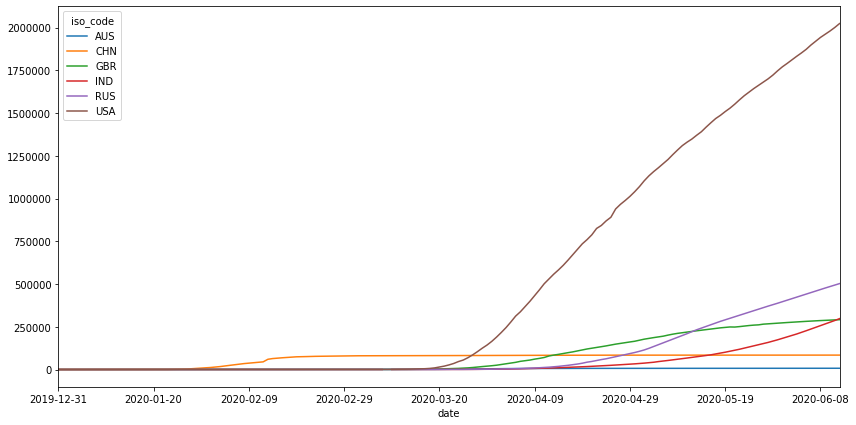

In [9]:
pivot_country = country_df.pivot(index='date', columns='iso_code', values='total_cases')
country_plot = pivot_country.plot(figsize=(14,7))